<a href="https://colab.research.google.com/github/AliRizvi14/CE888/blob/master/lab5/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [ ]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data.target## YOUR CODE HERE # label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
df.size

2492

In [ ]:
df.shape

(178, 14)

In [ ]:
#How many samples and features are there?

# YOUR CODE HERE

print('number of samples:', df.shape[0], 'number of features:', df.shape[1]-1)

number of samples: 178 number of features: 13


In [ ]:
df['y'].unique()

array([0, 1, 2])

In [ ]:
from pandas._libs.hashtable import value_count
# Quiz Q1
# How many instances are there for each class? 
df['y'].value_counts()


# YOUR CODE HERE


1    71
0    59
2    48
Name: y, dtype: int64

In [ ]:
df.columns


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'y'],
      dtype='object')

In [ ]:
total=len(df['magnesium'])
avg=sum(df['magnesium'])/total
avg

99.74157303370787

In [ ]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


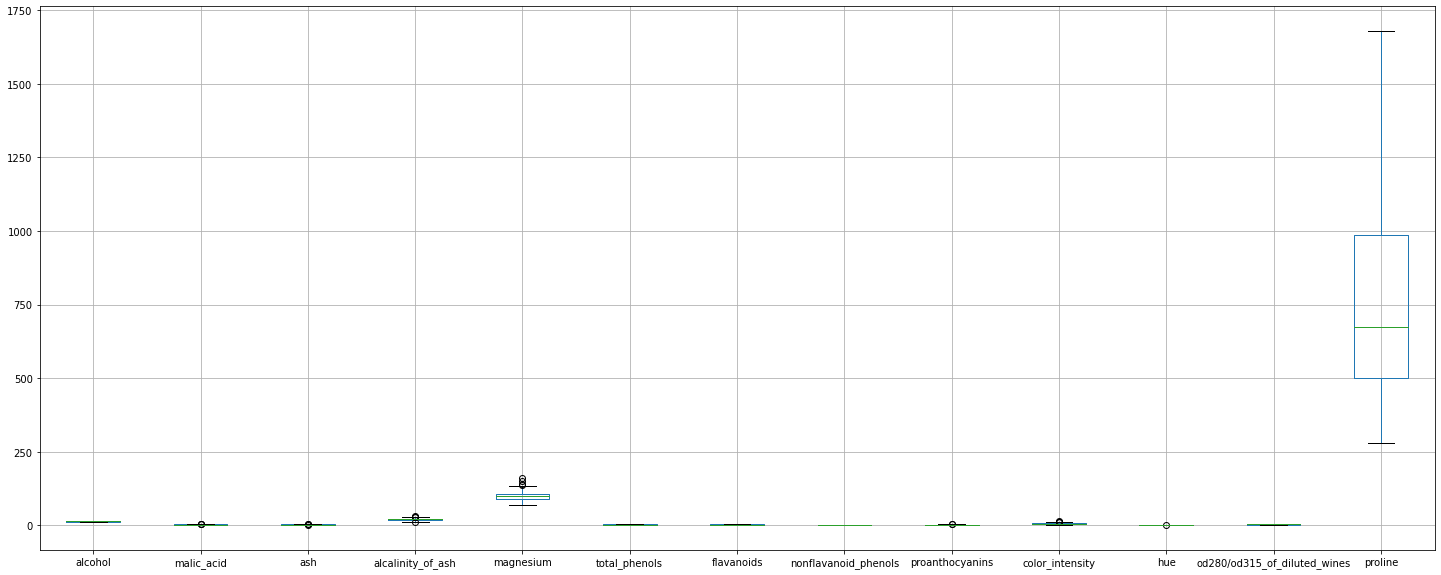

In [ ]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?
df1=df.drop(['y'],axis=1)
#df1.plot(figsize=(10,15));
df1.boxplot(figsize=(25,10))
# YOUR CODE HERE

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3252040610>,
      dtype=object)

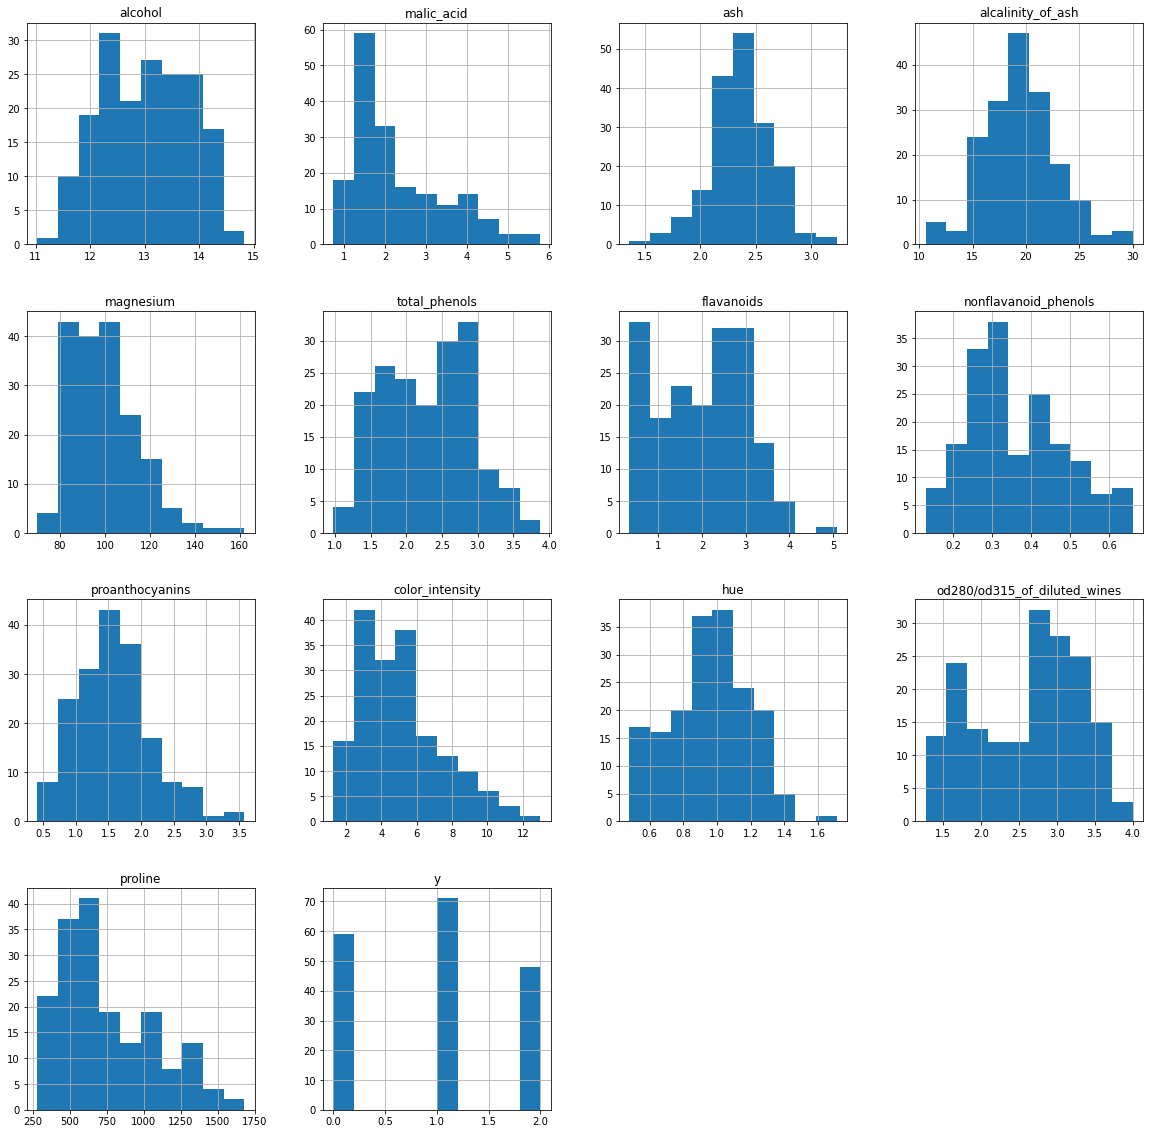

In [ ]:

# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
df.hist(figsize=(20,20))

Let's do some multivariate analysis

                               alcohol  ...   proline
alcohol                       1.000000  ...  0.643720
malic_acid                    0.094397  ... -0.192011
ash                           0.211545  ...  0.223626
alcalinity_of_ash            -0.310235  ... -0.440597
magnesium                     0.270798  ...  0.393351
total_phenols                 0.289101  ...  0.498115
flavanoids                    0.236815  ...  0.494193
nonflavanoid_phenols         -0.155929  ... -0.311385
proanthocyanins               0.136698  ...  0.330417
color_intensity               0.546364  ...  0.316100
hue                          -0.071747  ...  0.236183
od280/od315_of_diluted_wines  0.072343  ...  0.312761
proline                       0.643720  ...  1.000000

[13 rows x 13 columns]


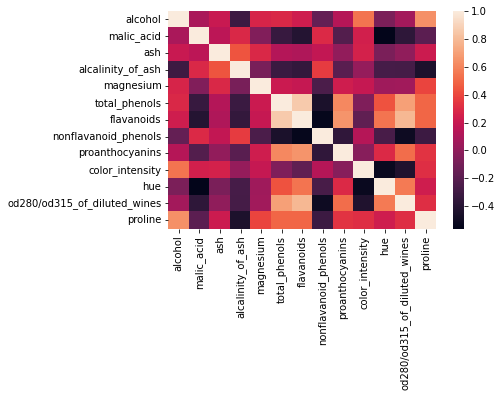

In [ ]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE
a=df1.corr()
print(a)
# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
sns.heatmap(a)
# YOUR CODE HERE

In [ ]:
df['flavanoids'].corr(df['magnesium'])


0.19578376985743284

In [ ]:
# What is the highest correlation between features?
from scipy.stats import pearsonr
corr, _ = pearsonr(df.flavanoids, df.total_phenols )
corr


0.8645635000951147

In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'y'],
      dtype='object')

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [ ]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

sc = StandardScaler()
df_scaled = sc.fit_transform(df.iloc[:,:-1])

df_scaled = pd.DataFrame(df_scaled, columns = df.columns[:-1])

df_scaled['y'] = df['y'].copy()
df_scaled
# YOUR CODE HERE

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?
pca= PCA(n_components=2)
pca_df = pca.fit_transform(df_scaled.iloc[:,:-1])
#students_pca_n = pca_n.fit_transform(X_processed)
np.cumsum(pca.explained_variance_ratio_)



# YOUR CODE HERE


array([0.36198848, 0.55406338])

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


def std_pca(df, var=0.5):
    y = False
    if 'y' in df.columns:
        y = True
        x = df.drop('y', axis=1, inplace=False)
    else:
        x = df.copy()
    x_std = StandardScaler().fit_transform(x)
    pca = PCA(n_components=var, random_state=100)
    pca_data = pca.fit_transform(x_std)
    if y:
        return np.concatenate((pca_data, df['y'].values.reshape(-1, 1)), axis=1)
    return pca_data

In [ ]:
pca_df

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

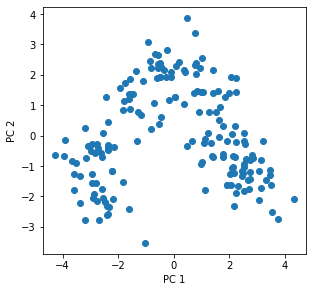

In [ ]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE
plt.figure(figsize=(16,10))
for i in range(1, 2):
    plt.subplot(2, 3, i)
    plt.scatter(pca_df[:, i-1], pca_df[:, i])
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.savefig('students_pca_pcs.pdf', dpi=300)
plt.show()

In [ ]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE
pca= PCA(n_components=6)
pca_df = pca.fit_transform(df_scaled.iloc[:,:-1])
np.cumsum(pca.explained_variance_ratio_)


array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116])

In [ ]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE
pca= PCA(n_components=3)
pca_df = pca.fit_transform(df_scaled.iloc[:,:-1])
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969])

## Clustering

Let's see how many clusters does K-Means find.



In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE


In [ ]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE


In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!